In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
file_path = 'supermarket_sales - Sheet1.csv'
dataset = pd.read_csv(file_path)


In [83]:
# Pastikan dataset sesuai dengan format yang diharapkan
print(dataset.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [84]:
# Memeriksa nilai null
print("Jumlah nilai null di setiap kolom:")
print(dataset.isnull().sum())

Jumlah nilai null di setiap kolom:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [127]:
# Menghitung jumlah data (baris) dan jumlah kolom
num_rows, num_cols = dataset.shape

print(f'Jumlah data: {num_rows} baris dan {num_cols} kolom')

Jumlah data: 1000 baris dan 18 kolom


In [135]:
# Mengonversi kolom kategorikal ke numerik
label_encoder_gender = LabelEncoder()
label_encoder_product = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])
# Membalik nilai encoding: 0 untuk Male, 1 untuk Female
dataset['Gender'] = dataset['Gender'].map({0: 1, 1: 0})
dataset['Product line'] = label_encoder_product.fit_transform(dataset['Product line'])

In [110]:
# Mengelompokkan 'Total' menjadi kategori
bins = [dataset['Total'].min(), dataset['Total'].quantile(0.33), dataset['Total'].quantile(0.66), dataset['Total'].max()]
labels = ['Low', 'Medium', 'High']
dataset['Total Category'] = pd.cut(dataset['Total'], bins=bins, labels=labels, include_lowest=True)

In [111]:
# Mengubah kategori menjadi numerik
label_encoder_total = LabelEncoder()
dataset['Total Category'] = label_encoder_total.fit_transform(dataset['Total Category'])

In [120]:
# Misalkan kolom fitur adalah 'Gender', 'Product Line', dan 'gross income', dan target adalah 'Total'
X = dataset[['Gender', 'Product line', 'gross income']].values
y = dataset['Total Category'].values

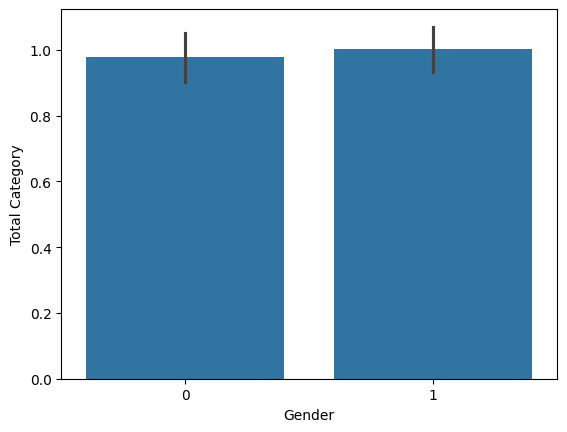

In [136]:
sns.barplot(x='Gender', y='Total Category', data=dataset)
plt.show()

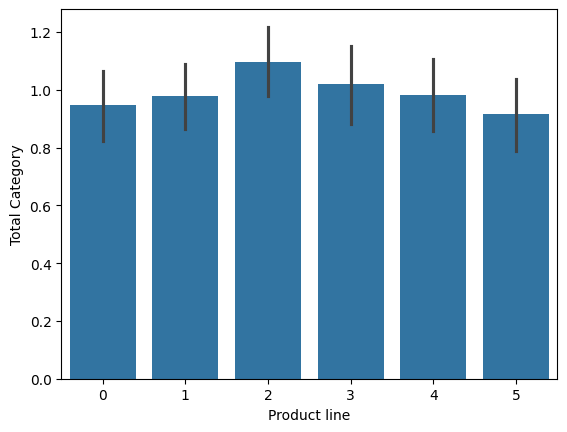

In [122]:
sns.barplot(x='Product line', y='Total Category', data=dataset)

# Menampilkan plot
plt.show()

In [142]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menggunakan model Gradient Boosting untuk meningkatkan akurasi
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [143]:
# Memprediksi hasil pada data uji
y_pred = gb_classifier.predict(X_test)

In [144]:
# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [145]:
print('Confusion Matrix:')
print(cm)
print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Best Parameters: {grid_search.best_params_}')

Confusion Matrix:
[[82  0  0]
 [ 0 87  0]
 [ 1  0 80]]
Akurasi: 99.60%
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
